In [632]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [633]:
#Defines Global Variables data entries
TOTAL_DATA = 150

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

# Number of input features
FEATURE_NUMBER = 4

# Number of classes and respective indexing
CLASS_NUMBER = 3
CLASSNAMES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [634]:
# Read in data
data = pd.read_csv('../DataSets/Iris.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
36,37,5.5,3.5,1.3,0.2,Iris-setosa
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
102,103,7.1,3.0,5.9,2.1,Iris-virginica
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [635]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)



In [636]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train_data = data.iloc[:TRAINING_DATA, -1].values
y_test_data = data.iloc[TRAINING_DATA:, -1].values

# Create vectorized representations of each data point's class membership
y_train = np.zeros(shape=(CLASS_NUMBER, TRAINING_DATA))
y_test = np.zeros(shape=(CLASS_NUMBER, TESTING_DATA))

# Setting numeric labels for each data point's class
for row in range(CLASS_NUMBER):
    y_train[row, :TRAINING_DATA]  = [ele == CLASSNAMES[row] for ele in y_train_data]
    y_test[row, :TESTING_DATA] = [ele == CLASSNAMES[row] for ele in y_test_data]

In [637]:
# Randomly initialize weights and bias matricies
w = np.random.rand(CLASS_NUMBER, FEATURE_NUMBER)
b = np.random.rand(CLASS_NUMBER, 1)



In [638]:
#Class coresspondance function, returns a vector (z), which will be input into softmax function
#The highest number in z represents the correct class
def class_corr(weights, bias, x):
    
    numData = x.shape[1]
    #print(numData)
    z = weights.dot(x)
    #print(z)
    for input in range(numData):
        z[0:CLASS_NUMBER, input:input+1] += bias

    return z

z = class_corr(w, b, x_test)
print(z)



[[ 1.15153178e+00 -1.24942427e+00 -6.06860938e-01  2.02409858e+00
  -2.44423078e+00 -1.55177157e+00  1.20098229e+00  2.23096733e-01
   1.42138212e+00  4.09578051e-01  9.19155922e-01 -6.44253482e-01
   7.21021191e-01  1.32241820e+00  1.56515605e+00 -1.00321534e-01
   1.11268566e-03 -2.19019911e-01 -1.25323937e+00  5.53335056e-02
  -1.09122621e+00  1.84442892e+00  6.70898461e-03 -5.32584908e-01
   1.14042169e+00  2.37924608e+00  1.80840870e+00 -1.00084790e+00
   1.89694468e+00  2.21283685e+00]
 [ 1.28690983e+00 -4.16227322e-01  2.32647949e-01  2.05381557e+00
  -1.24191972e+00 -2.93932161e-01  1.07099004e+00  2.34457037e-01
   1.60891237e+00  8.83516630e-01  1.11123885e+00  1.18862283e-01
   1.13437414e+00  1.29711764e+00  1.70850805e+00  7.03668857e-01
   1.05803959e-01  3.37150137e-01 -6.39153349e-01  2.60419665e-01
  -3.19050824e-01  2.16656958e+00  1.54018522e-01 -1.45877279e-01
   1.07842267e+00  1.62520044e+00  1.67370029e+00 -2.08924009e-01
   1.46585899e+00  2.23338629e+00]
 [ 1.1

In [639]:
#Softmax Function
#expnentiates all elements of the z vector and divides by their sum to see class probability
def softmax(z):

    #creates empty probability array
    y_hat = np.empty([z.shape[0], z.shape[1]])
    numData = z.shape[1]

    #exponentiates the matrix
    z_exp = np.exp(z)

    #Converts z vector into probability distribution
    for input in range(numData):
        z_sum = np.sum(z_exp[0:CLASS_NUMBER, input:input+1])
        y_hat[0:CLASS_NUMBER, input:input+1] = z_exp[0:CLASS_NUMBER, input:input+1]/z_sum
    return y_hat


y_pred = softmax(z)
print(softmax(z))


[[0.31758603 0.21643481 0.16834118 0.37400291 0.11430688 0.13828822
  0.36433479 0.3160498  0.3372175  0.27363205 0.30762853 0.18263292
  0.31380111 0.37436531 0.38632021 0.23494498 0.31761052 0.27314751
  0.18529418 0.28607452 0.19487571 0.29965487 0.34393481 0.27915584
  0.41073535 0.5142583  0.44506868 0.20624162 0.43650873 0.40741053]
 [0.36362634 0.49794336 0.38974849 0.38528394 0.38039028 0.48647206
  0.3199232  0.31966069 0.40677425 0.43953744 0.37277533 0.3917383
  0.47442917 0.36501247 0.44586605 0.52497033 0.35266448 0.47636389
  0.34241749 0.35119391 0.42180257 0.41354736 0.39852158 0.41095257
  0.3860435  0.24193764 0.38897699 0.45530716 0.28364478 0.4158692 ]
 [0.31878763 0.28562183 0.44191033 0.24071315 0.50530284 0.37523972
  0.31574201 0.36428952 0.25600826 0.28683051 0.31959614 0.42562877
  0.21176972 0.26062222 0.16781374 0.24008469 0.32972499 0.2504886
  0.47228833 0.36273157 0.38332172 0.28679777 0.25754361 0.30989159
  0.20322115 0.24380406 0.16595434 0.33845122 0.

In [640]:
#Loss function
#Returns the sum of all probabilities compared to the actual class
def cost(y, y_pred):

    total_loss = 0

    #Finds number of data samples
    numData = y.shape[1]

    #Manipulates y_pred into right form for the loss function
    y_pred = -1*np.log(y_pred)

    #iterates over all data samples
    for column in range(numData):

        #Computes total class loss for each data sample and sums them
        y_cur = y[0:CLASS_NUMBER, column:column+1].transpose()
        y_pred_cur = (y_pred[0:CLASS_NUMBER, column:column+1])
        total_loss += y_cur.dot(y_pred_cur)[0][0]

    #Divdes by number of data samples to find average error
    total_loss = total_loss/numData
    return total_loss
    
    

        



cost(y_test, y_pred)

1.2307529036445366

In [641]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[1]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()
    

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  ((1/numData) * error.sum(axis=0)).reshape(1, CLASS_NUMBER)
    
    return gradientDict

y_pred = softmax(z)
findGradients(x_test, y_test, y_pred)

{'gradWeights': array([[-0.0044949 ,  0.11328066, -0.10878577],
        [ 0.27425862, -0.18718739, -0.08707123],
        [ 0.08608613, -0.03692241, -0.04916372],
        [ 0.04358137,  0.04500816, -0.08858953]]),
 'gradBias': array([[-0.06600472,  0.06344649,  0.00255823]])}

In [642]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate, coeff_momentum):
    #Intializes starting variables and matricies which will get updated during momentum calculation
    old_grad_weights = np.zeros(shape=(FEATURE_NUMBER, CLASS_NUMBER))
    old_grad_bias = np.zeros(shape=(1, CLASS_NUMBER))

    momentum_grad_weights = np.zeros(shape=(FEATURE_NUMBER, CLASS_NUMBER))
    momentum_grad_bias = np.zeros(shape=(1, CLASS_NUMBER))

    for i in range(max_iter): 
        z = class_corr(weights, bias, x)
        #print(z.shape)
        y_pred = softmax(z)
        gradients = findGradients(x, y, y_pred)

        #Calculates Momentum
        momentum_grad_weights = coeff_momentum * momentum_grad_weights + (1-coeff_momentum) * old_grad_weights
        momentum_grad_bias = coeff_momentum * momentum_grad_bias + (1-coeff_momentum) * old_grad_bias
        
        # Compute gradient descent
        weights = weights - (learning_rate * momentum_grad_weights.transpose())
        bias = bias - (learning_rate * momentum_grad_bias.transpose())
       
        #Updates the old gradients for weights and bias
        old_grad_weights = gradients["gradWeights"]
        old_grad_bias = gradients["gradBias"]

        # Not required - meant to visualize model's performance
        loss = cost(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.95

    return weights, bias


In [643]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=50, learning_rate=0.1, coeff_momentum=0.9)

#print(w)
#print(b)

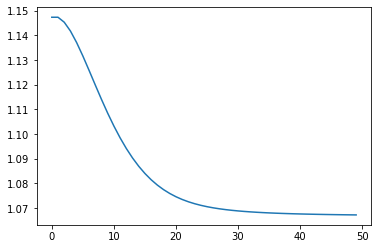

In [644]:
plt.plot(losses)

In [645]:
# Calculates accuracy of test data
def accuracy(y, y_pred):

    total_correct = 0
    confusion_matrix = np.zeros(shape=(CLASS_NUMBER, CLASS_NUMBER))

    numData = y.shape[1]
    
    # Iterating through all of data
    for data in range(numData):
        # Returns array for index of max probabilities for each data point 
        y_indexes = np.argmax(y, axis=0)
        y_pred_indexes = np.argmax(y_pred, axis=0)
        
        confusion_matrix[y_indexes[data]][y_pred_indexes[data]] += 1
        total_correct = np.sum(y_indexes == y_pred_indexes)
        
    total_accuracy = total_correct/numData
    return confusion_matrix, total_accuracy 


In [646]:
# Accuracy and confusion matrix check
z = class_corr(w, b, x_test)
y_pred = softmax(z)

confusion_matrix, model_acc = accuracy(y_test, y_pred)

print(confusion_matrix)
print(model_acc)


[[7. 2. 2.]
 [3. 6. 1.]
 [5. 3. 1.]]
0.4666666666666667


NameError: name 'pred_pos' is not defined